In [5]:
#import needed libraries 

import numpy as np 
import pandas as pd 
import re
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats

In [58]:
#inspect the data

winemag_130k = pd.read_csv("../datasets/winemag-data-130k-v2.csv")

winemag_130k.head(5)
winemag_130k['variety'].unique


unique_variety = winemag_130k['variety'].unique()
number_varieties = winemag_130k['variety'].nunique() 
print (number_varieties)
print (unique_variety)
print (winemag_130k.columns)



707
['White Blend' 'Portuguese Red' 'Pinot Gris' 'Riesling' 'Pinot Noir'
 'Tempranillo-Merlot' 'Frappato' 'Gewürztraminer' 'Cabernet Sauvignon'
 'Nerello Mascalese' 'Chardonnay' 'Malbec' 'Tempranillo Blend' 'Meritage'
 'Red Blend' 'Merlot' "Nero d'Avola" 'Chenin Blanc' 'Gamay'
 'Sauvignon Blanc' 'Viognier-Chardonnay' 'Primitivo' 'Catarratto'
 'Inzolia' 'Petit Verdot' 'Monica' 'Bordeaux-style White Blend' 'Grillo'
 'Sangiovese' 'Cabernet Franc' 'Champagne Blend'
 'Bordeaux-style Red Blend' 'Aglianico' 'Petite Sirah' 'Touriga Nacional'
 'Carmenère' 'Albariño' 'Petit Manseng' 'Rosé' 'Zinfandel' 'Vernaccia'
 'Rosato' 'Grüner Veltliner' 'Viognier' 'Vermentino' 'Grenache Blanc'
 'Syrah' 'Nebbiolo' 'Shiraz-Cabernet Sauvignon' 'Pinot Blanc'
 'Alsace white blend' 'Barbera' 'Rhône-style Red Blend' 'Portuguese White'
 'Graciano' 'Tannat-Cabernet' 'Sauvignon' 'Sangiovese Grosso' 'Torrontés'
 'Prugnolo Gentile' 'G-S-M' 'Verdejo' 'Fumé Blanc' 'Furmint'
 'Pinot Bianco' 'Bonarda' 'Shiraz' 'Montepulcia

In [3]:
df = pd.read_csv("../datasets/winemag-data-130k-v2.csv")
clean_description_df =  pd.read_csv("../datasets/clean_description.csv")

clean_description_df.head(5)

,Unnamed: 0,clean_description
0,0,aroma include tropical fruit broom brimstone d...
1,1,ripe fruity smooth still structure firm tannin...
2,2,tart snappy flavor lime flesh rind dominate gr...
3,3,pineapple rind lemon pith orange blossom start...
4,4,much like regular bottle come across rather ro...


In [6]:
#summarize winemag_150k and winemag_130k data

def wineinfo(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Uniques'] = df.nunique().values
    summary['Missing'] = df.isnull().sum().values    
    summary['Percent Missing'] = df.isnull().sum().values  * 100 / len(df)
  
    return summary

print (wineinfo(winemag_130k))
print (winemag_130k.columns)

Dataset Shape: (129971, 14)
                     Name   dtypes  Uniques  Missing  Percent Missing
0              Unnamed: 0    int64   129971        0         0.000000
1                 country   object       43       63         0.048472
2             description   object   119955        0         0.000000
3             designation   object    37979    37465        28.825661
4                  points    int64       21        0         0.000000
5                   price  float64      390     8996         6.921544
6                province   object      425       63         0.048472
7                region_1   object     1229    21247        16.347493
8                region_2   object       17    79460        61.136715
9             taster_name   object       19    26244        20.192197
10  taster_twitter_handle   object       15    31213        24.015357
11                  title   object   118840        0         0.000000
12                variety   object      707        1         0

In [7]:
#better understand points column for the datasets


print (winemag_130k['points'].min())
print (winemag_130k['points'].max())

80
100


In [8]:
#merge the data into one dataframe using an outerjoin

winereviews_df = winemag_130k

print (winereviews_df.columns)
print (winereviews_df.describe(include='all',))


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
           Unnamed: 0 country  \
count   129971.000000  129908   
unique            NaN      43   
top               NaN      US   
freq              NaN   54504   
mean     64985.000000     NaN   
std      37519.540256     NaN   
min          0.000000     NaN   
25%      32492.500000     NaN   
50%      64985.000000     NaN   
75%      97477.500000     NaN   
max     129970.000000     NaN   

                                              description designation  \
count                                              129971       92506   
unique                                             119955       37979   
top     Seductively tart in lemon pith, cranberry and ...     Reserve   
freq                                                    3        2009   
mean          

In [9]:
# check basic statistic data, percent missing value data and thier column types.
def wineinfo(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Uniques'] = df.nunique().values
    summary['Missing'] = df.isnull().sum().values    
    summary['Percent Missing'] = df.isnull().sum().values  * 100 / len(df)
  
    return summary

print (wineinfo(winereviews_df))
print (winereviews_df.columns)

Dataset Shape: (129971, 14)
                     Name   dtypes  Uniques  Missing  Percent Missing
0              Unnamed: 0    int64   129971        0         0.000000
1                 country   object       43       63         0.048472
2             description   object   119955        0         0.000000
3             designation   object    37979    37465        28.825661
4                  points    int64       21        0         0.000000
5                   price  float64      390     8996         6.921544
6                province   object      425       63         0.048472
7                region_1   object     1229    21247        16.347493
8                region_2   object       17    79460        61.136715
9             taster_name   object       19    26244        20.192197
10  taster_twitter_handle   object       15    31213        24.015357
11                  title   object   118840        0         0.000000
12                variety   object      707        1         0

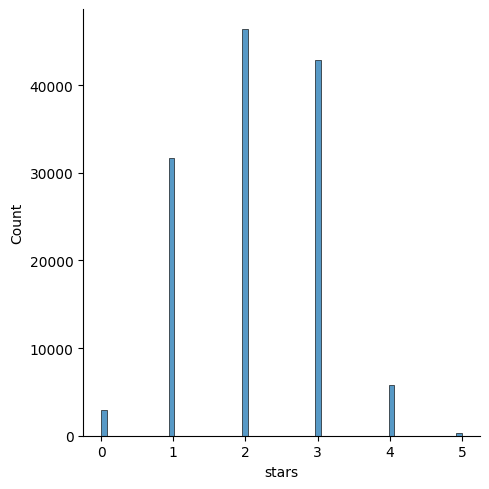

In [10]:
#change points from 80-100 to a 5 point system

def stars(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,97)):
        return 4
    else:
        return 5

winereviews_df["stars"] = winereviews_df["points"].apply(stars)
sns.displot(winereviews_df, x="stars")

In [ ]:
#check summary of merged data

print (wineinfo(winereviews_df))
print (winereviews_df.columns)

<AxesSubplot: xlabel='variety', ylabel='points'>

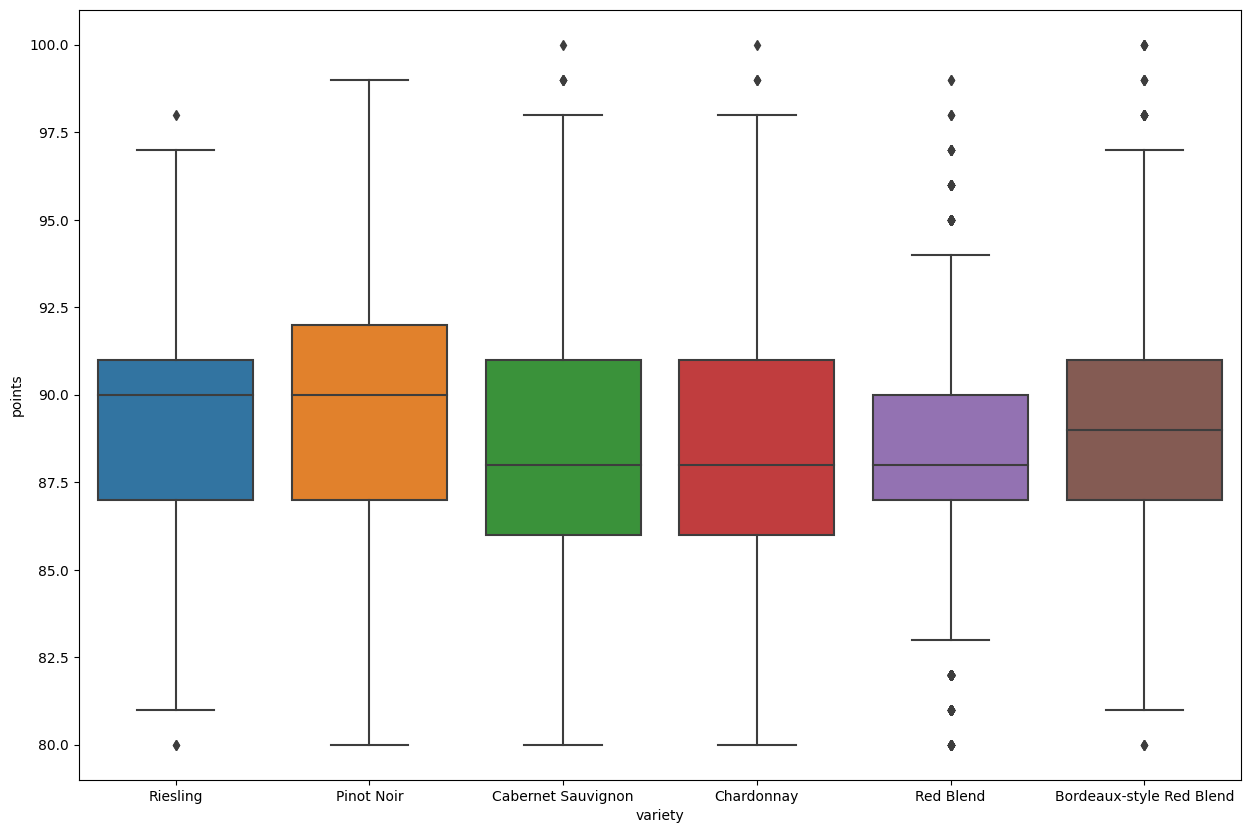

In [11]:
#visualize points ratings in relation to variety of wine
wines= winereviews_df[winereviews_df.variety.isin(winereviews_df.variety.value_counts().head(6).index)]

plt.figure(figsize = (15,10))
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = wines
)


<AxesSubplot: xlabel='country', ylabel='points'>

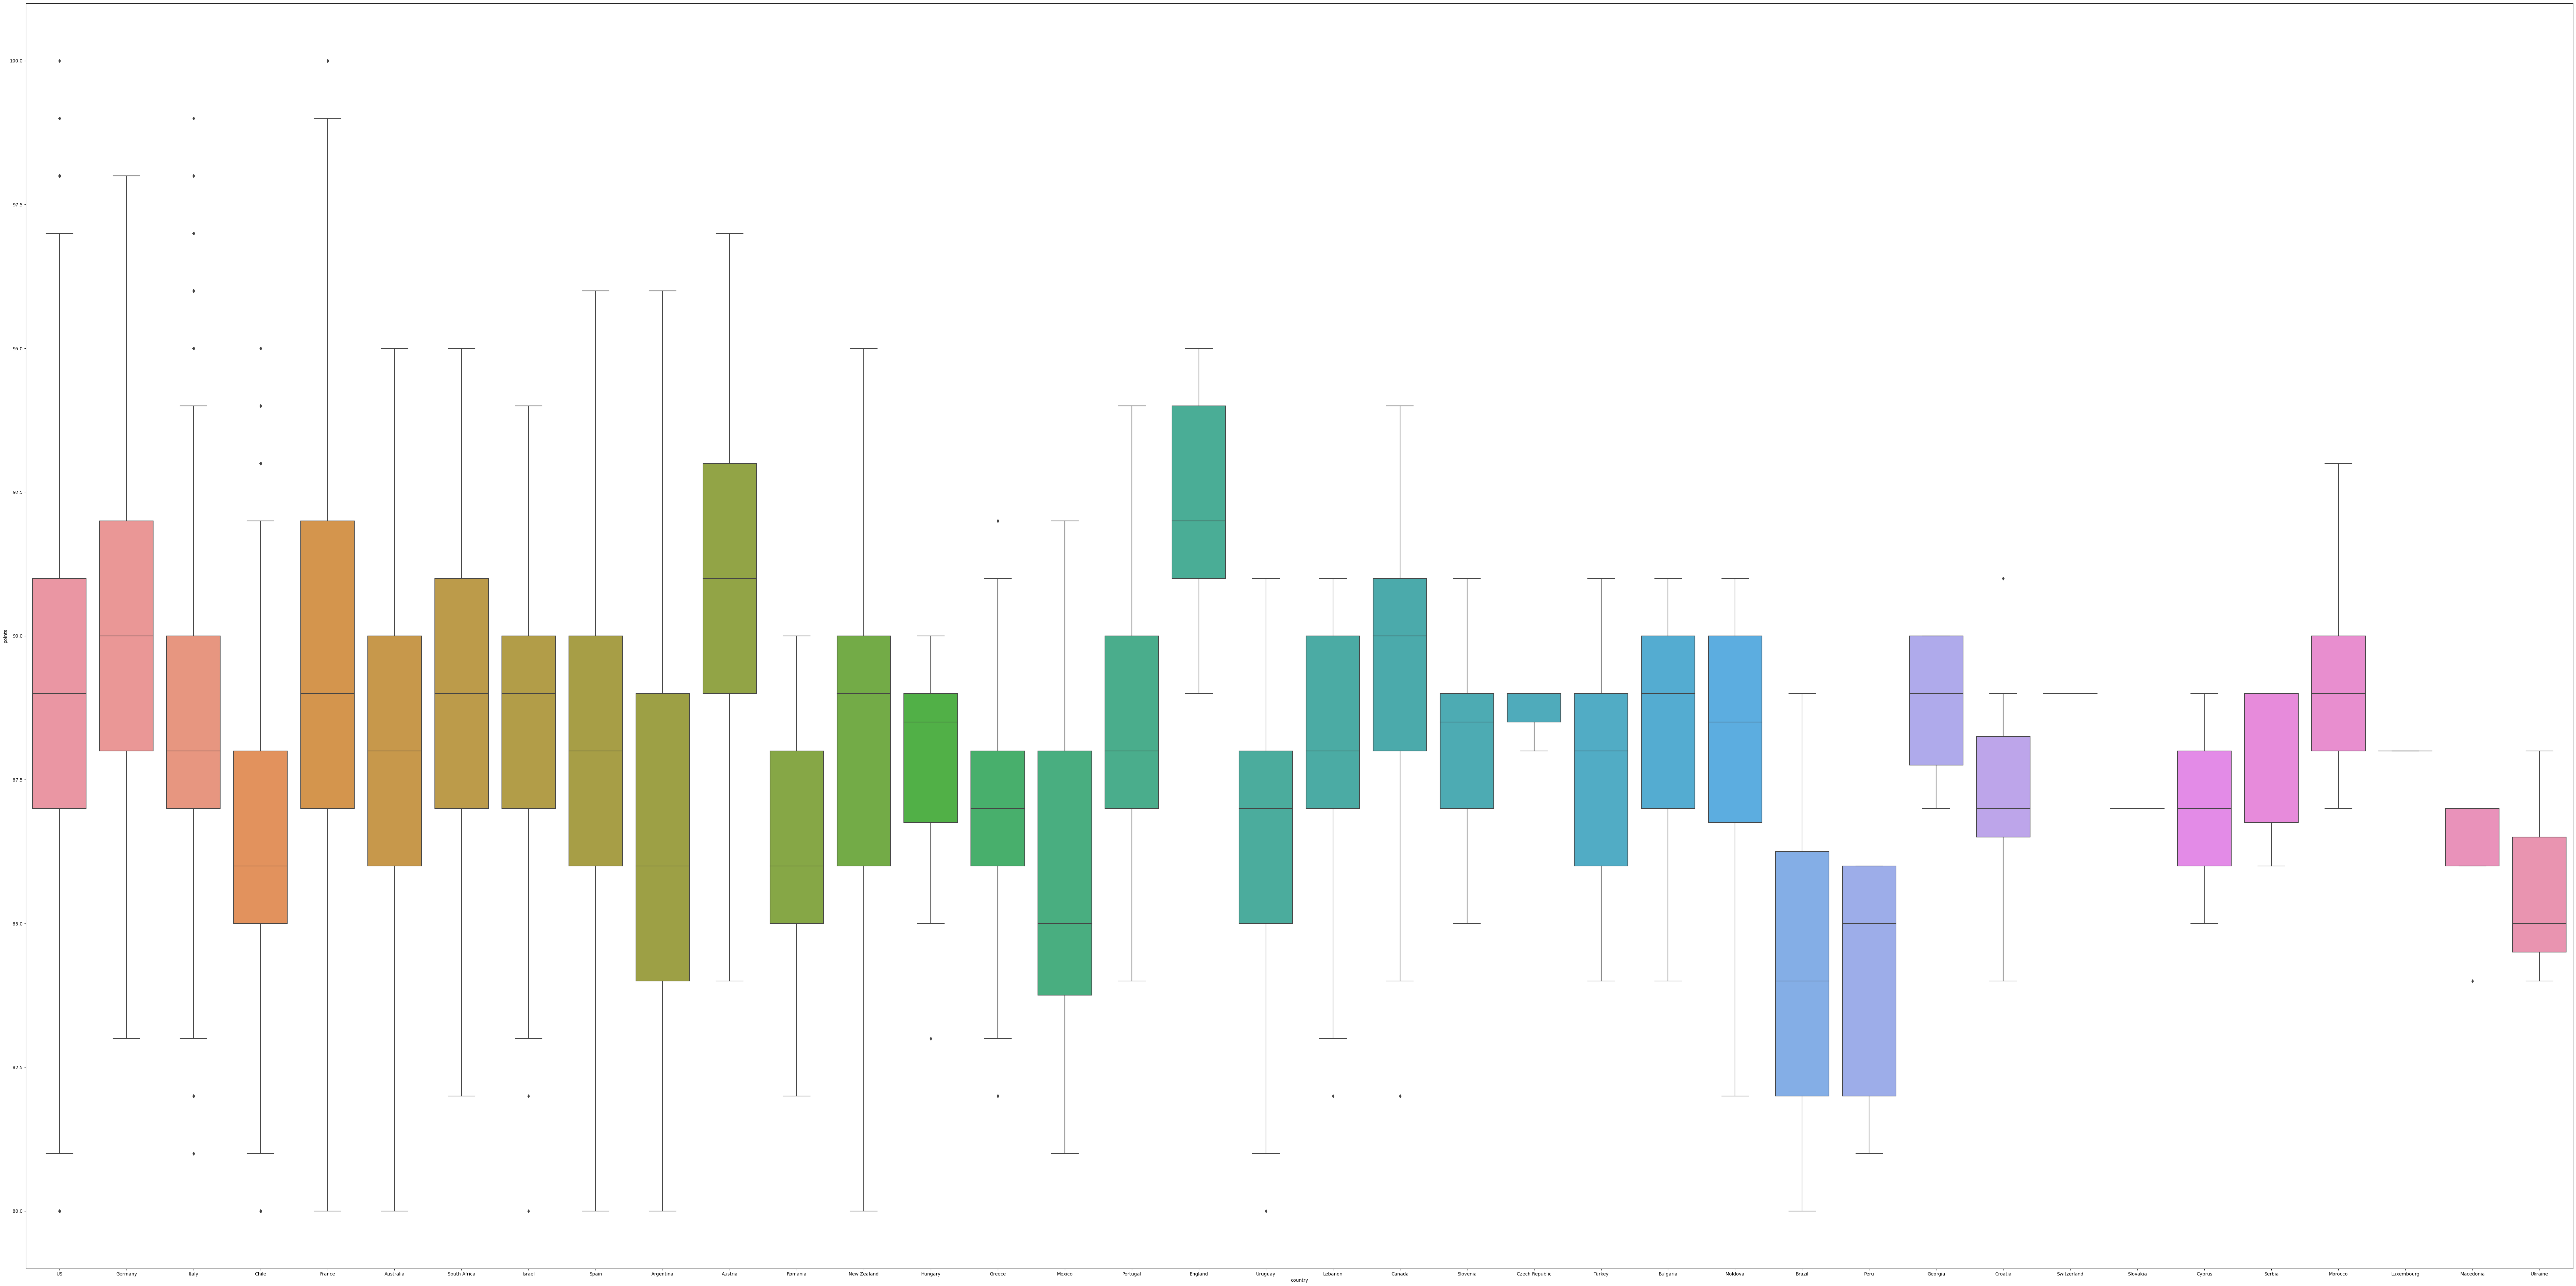

In [12]:
# point with country boxplot
plt.figure(figsize = (100,50))

sns.boxplot(
    x = 'country',
    y = 'points',
    data = wines
)

In [ ]:
#how many unique varieties of wine in df

unique_variety = winereviews_df['variety'].unique()
print(unique_variety.count)

/tmp/ipykernel_13790/1108367701.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print (country.mean().sort_values(by="points",ascending=False).head())


           Unnamed: 0     points      price     stars
country                                              
England  72597.756757  91.581081  51.681159  3.027027
India    68964.000000  90.222222  13.333333  2.777778
Austria  65614.296861  90.101345  30.762772  2.606278
Germany  65787.590762  89.851732  42.257547  2.553349
Canada   70582.365759  89.369650  35.712598  2.431907


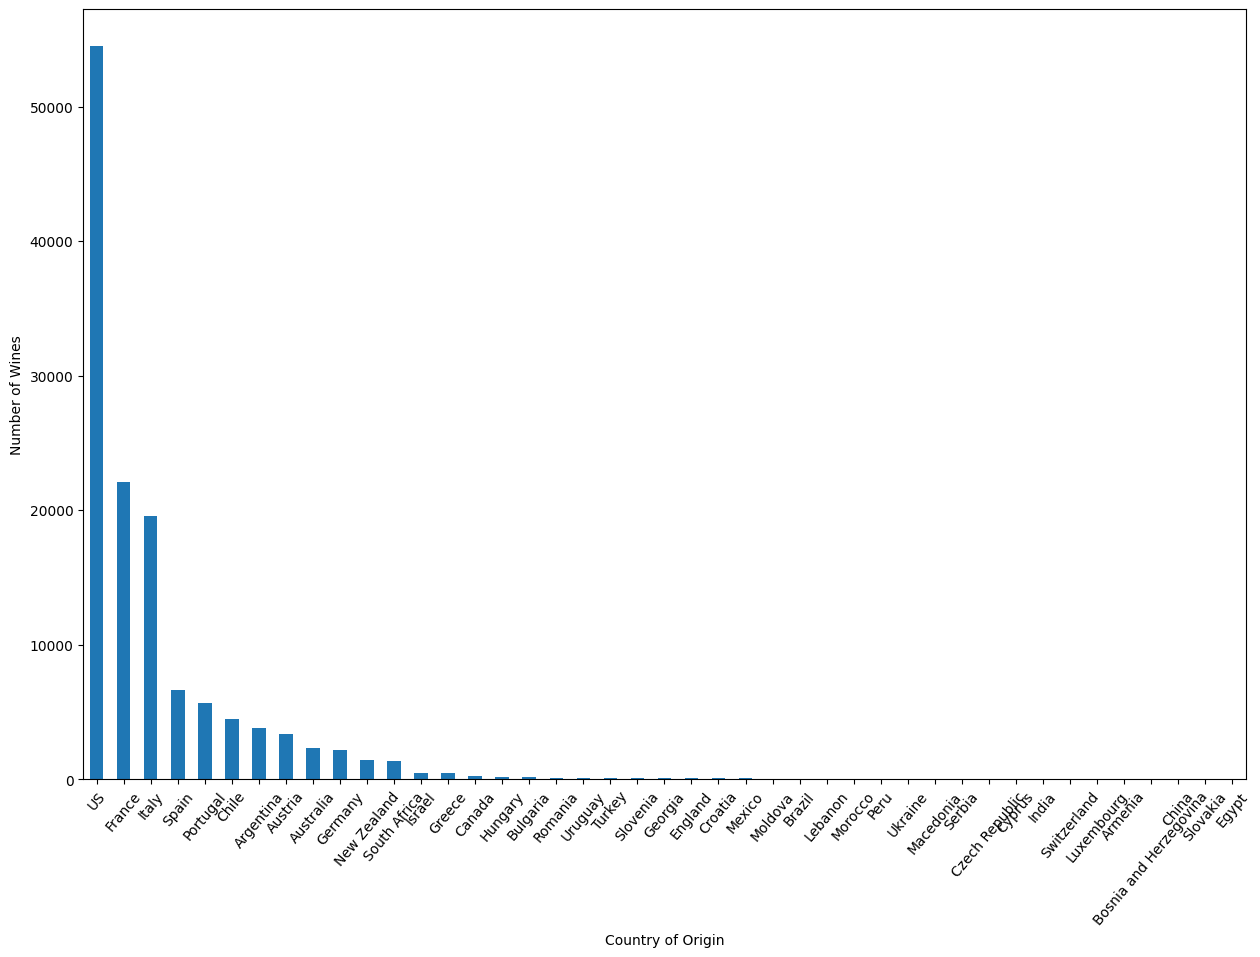

In [13]:
#groupby by country
country = winereviews_df.groupby("country")

#summary of countries
country.describe().head()

#top 5 highest average points among all 44 countries
print (country.mean().sort_values(by="points",ascending=False).head())

#plot of countries with highest average points
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

/tmp/ipykernel_13790/1262885537.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  country.max().sort_values(by="points",ascending=False)["points"].plot.bar()


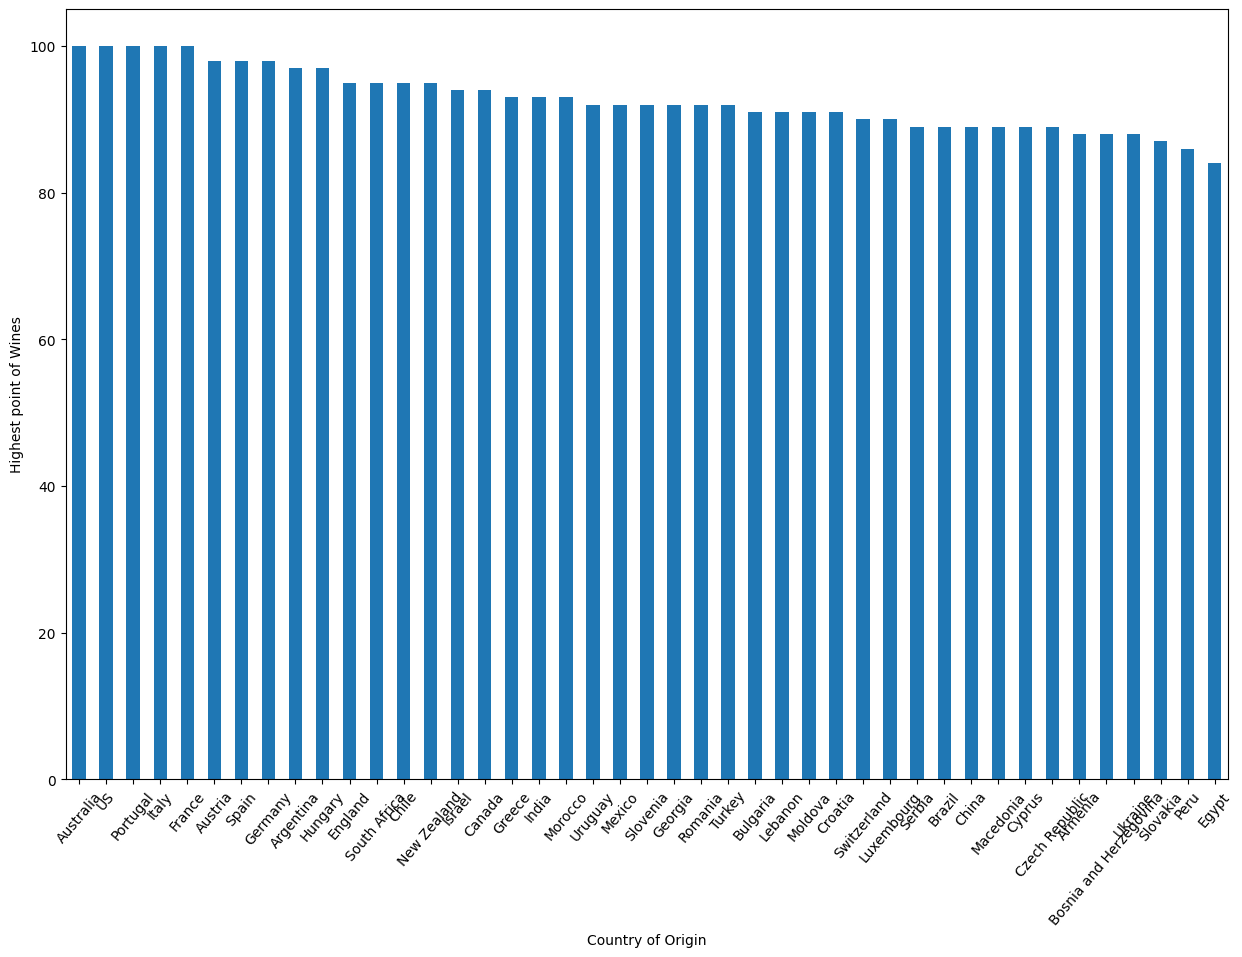

In [14]:
#quantity or quality

plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

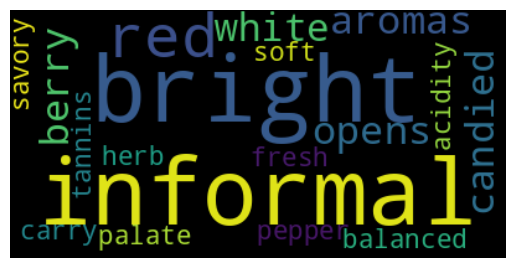

In [15]:
#wordcloud tutorial 

?WordCloud

# Start with one review:
text = winereviews_df.description[6]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



There are 31661073 words in the combination of all review.


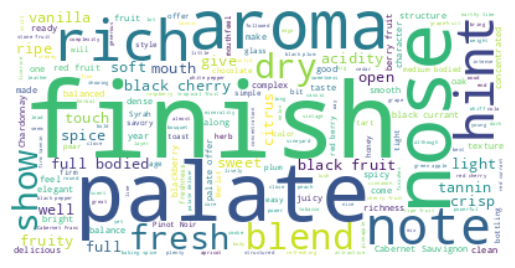

In [16]:
#wordcloud tutorial continued 

#combine all reviews to see one large wordcloud description for all reviews
text = " ".join(review for review in winereviews_df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#join reviews for wine sorted by country

# Join all reviews of each country:
usa = " ".join(review for review in winereviews_df[winereviews_df["country"]=="US"].description)
fra = " ".join(review for review in winereviews_df[winereviews_df["country"]=="France"].description)
ita = " ".join(review for review in winereviews_df[winereviews_df["country"]=="Italy"].description)
spa = " ".join(review for review in winereviews_df[winereviews_df["country"]=="Spain"].description)
por = " ".join(review for review in winereviews_df[winereviews_df["country"]=="Portugal"].description)

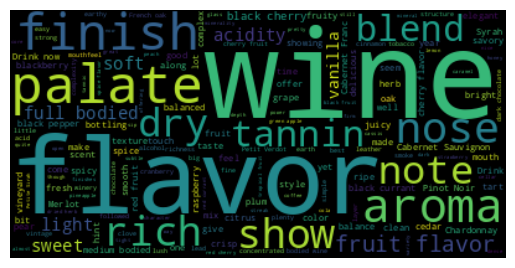

In [18]:
# Start with one country
text = usa

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#join reviews for wine sorted by top variety

pinot_noir = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Pinot Noir"].description)
chardonnay = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Chardonnay"].description)
cabernet_sauvignon = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Cabernet Sauvignon"].description)
red_blend = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Red Blend"].description)
bordeaux_style_red_blend = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Bordeaux-style Red"].description)

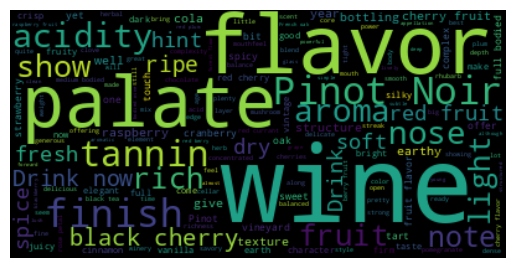

In [125]:
# Start with one review:
text = pinot_noir

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [212]:
#LDA algorithm 
from html.parser import HTMLParser
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [263]:
#upload clean descriptions 
clean_df = pd.read_csv("../datasets/clean_description.csv")

merged = winereviews_df.merge(clean_df,how = "outer")








KeyError: "['taster_twitter_handle'] not found in axis"

Function For Food and Wine Pairings

In [139]:
#lists for wine varieties and categories

l_reds=["Portuguese Red","Pinot Noir","Malbec","Bordeaux-style Red Blend","Red Blend","Merlot","Syrah","Rhône-style Red Blend","Shiraz","Merlot-Malbec","Syrah-Cabernet","Malbec-Cabernet Franc","Cabernet Sauvignon-Shiraz"," Syrah-Cabernet Sauvignon","Merlot-Cabernet Franc","Syrah-Merlot","Cabernet Sauvignon-Malbec","Malbec-Cabernet Sauvignon","Malbec-Syrah","Cabernet-Syrah","Merlot-Cabernet Sauvignon","Cabernet","Shiraz-Cabernet","Cabernet Sauvignon-Merlot-Shiraz","Malbec-Cabernet","Merlot-Shiraz","Cabernet-Malbec","Tempranillo-Merlot","Frappato","Cabernet Sauvignon","Nerello Mascalese","Tempranillo Blend","Nero d'Avola","Gamay","Primitivo","Petit Verdot","Monica","Sangiovese","Cabernet Franc","Aglianico","Petite Sirah","Touriga Nacional","Carmenère","Nebbiolo","Shiraz-Cabernet Sauvignon","Barbera","Graciano","Tannat-Cabernet","Sangiovese Grosso","Prugnolo Gentile","G-S-M","Bonarda","Montepulciano","Grenache","Syrah-Viognier","Blaufränkisch","Carignan-Grenache","Sagrantino","Cabernet Sauvignon-Syrah","Shiraz-Viognier","Mencía","Zweigelt","Cannonau","Syrah-Grenache","Dolcetto","Garnacha Tintorera","Pinot Nero","Pinotage","Pinot Noir-Gamay","Cabernet Sauvignon-Carmenère","Früburgunder","Sousão","Cinsault","Tinta Miúda","Monastrell","Corvina","Rondinella","Molinara","Cabernet Sauvignon-Merlot","Duras","Papaskarasi","Tannat-Syrah","Charbono","Merlot-Argaman","Provence red blend","Tannat","Garnacha","Negroamaro","Mourvèdre","Cabernet Sauvignon-Sangiovese","Austrian Red Blend","Teroldego","Claret","Baga","Malbec-Merlot","Malbec-Tannat","Monastrell-Syrah","Refosco","Aragonês","Agiorgitiko","Ruché","Tinta de Toro","Cabernet Moravia","Chambourcin","Nero di Troia","Lambrusco di Sorbara","Cesanese","Feteasca Neagra ","Lagrein","Tinta Fina","St. Laurent","Pugnitello","Touriga Nacional Blend","Tinta Roriz","Cabernet Franc-Cabernet Sauvignon","Grenache-Syrah","Cabernet Merlot","Tempranillo-Cabernet Sauvignon","Aragonez","Syrah-Petite Sirah","Cabernet Blend","Cabernet Franc-Carmenère","Magliocco","Gamay Noir","Spätburgunder","Plavac Mali","Lemberger ","Saperavi","Dornfelder","Ojaleshi","Mondeuse","Perricone","Tinto Fino","Carignano","Cabernet Franc-Merlot","Syrah-Petit Verdot","Syrah-Mourvèdre","Carcajolu","Shiraz-Grenache","Grenache-Carignan","Lambrusco Grasparossa","Marselan","Schiava","Alfrocheiro","Corvina","Norton","Alicante Bouschet","Cabernet Sauvignon-Tempranillo","Carignan","Black Muscat","Grenache Noir","Xinomavro","Tinto del Pais","Johannisberg Riesling","Petite Verdot","Valdiguié","Uva di Troia","Kalecik Karasi","Karasakiz","Mourvèdre-Syrah","Negrette","Raboso","Marzemino","Tinta Barroca","Castelão","Teran","Freisa","Trincadeira","Merlot-Tannat","Melnik","Grenache Blend","Gros Manseng","Brachetto","Ekigaïna","Sangiovese Cabernet","Touriga Nacional-Cabernet Sauvignon","Argaman","Bobal","Cabernet Sauvignon-Cabernet Franc","Baco Noir","Tempranillo-Tannat","Touriga Franca","Barbera-Nebbiolo","Prieto Picudo","Gaglioppo","Piedirosso","Mansois","Tempranillo-Garnacha","Carmenère-Cabernet Sauvignon","Susumaniello","Carignane","Tannat-Merlot","Nerello Cappuccio","Counoise","Mazuelo","Tinta del Pais","Vranec","Mavrud","Cesanese d'Affile","Grenache-Mourvèdre","Forcallà","Syrah-Tempranillo","Merlot-Cabernet","Tinta del Toro","Jaen","Sangiovese-Cabernet Sauvignon","Prunelard","Malbec-Petit Verdot","Grignolino","Garnacha-Syrah","Tempranillo-Shiraz ","Rufete","Mataro","Tinta Cao","Blauer Portugieser","Groppello","Alvarelhão","Poulsard","Grenache-Shiraz","Baga-Touriga Nacional","Mavrodaphne","Ciliegiolo","Sciaccerellu","Rosenmuskateller","Touriga","Carmenère-Syrah","Mavroudi","Casavecchia","Tinto Velasco","Kadarka","Okuzgozu","Lambrusco Salamino","Sangiovese-Syrah","Tannat-Cabernet Franc"," Fer Servadou","Mission ","Blauburgunder","Marquette","Braucol"," Cabernet Franc-Malbec","Pallagrello Nero","Vespolina","Shiraz-Malbec","Rebo","Tempranillo-Malbec","Trousseau","Syrah-Malbec","Syrah-Cabernet Franc","Cariñena-Garnacha","Rara Neagra","Abouriou","Pinot Noir-Syrah","Nielluciu","Malbec-Bonarda","Malbec-Carménère","Vinhão","Souzao","Tinta Francisca"," Listán Negro","Pinotage-Merlot"," Grolleau","Syrah-Grenache-Viognier","Jacquez","Canaiolo","Carignan-Syrah","Bombino Nero","Mavrotragano","Bovale","Frankovka","Cabernet-Shiraz","Syrah-Carignan","Garnacha Blend","Schwartzriesling","Malbec Blend","Merlot-Syrah","Cabernet Pfeffer","Babić"," Mandilaria","Saperavi-Merlot","Teroldego Rotaliano","Garnacha-Tempranillo","Albarossa","Cabernet Sauvignon Grenache","Black Monukka","Merlot-Grenache","Vranac","Tempranillo-Syrah","Uvalino","Boğazkere","Tinta Amarela","Tinta Negra Mole","Chelois ","Shiraz-Tempranillo","Syrah-Bonarda","Durif","Malbec-Tempranillo","Monastrell-Petit Verdot","Sirica"," Espadeiro","Blatina","Karalahna","St. Vincent","Chancellor","Blauburger","Colorino","Tinta Madeira","Centesimino","Merlot-Petite Verdot","Ramisco","Garnacha-Cabernet","Garnacha-Cariñena","Gamza","Cabernet Franc-Lemberger","Shiraz-Mourvèdre"," Mavrokalavryta","Babosa Negro","Tintilia ","Kotsifali","Parraleta","Otskhanuri Sapere","Trollinger","Tsapournakos","Francisa","Kuntra","Pignolo","Bobal-Cabernet Sauvignon"]
l_whites=["White Blend","Bordeaux-style White Blend","Chardonnay","Sauvignon Blanc","Portuguese White","Alsace white blend","Rhône-style White Blend","Chardonnay-Sauvignon Blanc","Sémillon","Chenin Blanc-Chardonnay","Semillon-Sauvignon Blanc","Sauvignon Blanc-Chardonnay","Chenin Blanc-Sauvignon Blanc","Chardonnay-Sauvignon","Provence white blend","Sauvignon-Sémillon","Sauvignon Blanc-Chenin Blanc","Chardonnay-Pinot Blanc","Semillon-Chardonnay","Pinot Gris","Riesling","Gewürztraminer","Chenin Blanc","Viognier-Chardonnay","Catarratto","Inzolia","Grillo","Albariño","Petit Manseng","Vernaccia","Grüner Veltliner","Viognier","Vermentino","Grenache Blanc","Pinot Blanc","Alsace white blend","Torrontés","Verdejo","Fumé Blanc","Furmint","Pinot Bianco","Moscato","Ugni Blanc-Colombard","Friulano","Assyrtico","Savagnin","Vignoles","Muscadelle","Garganega","Pinot Grigio","Tempranillo","Zierfandler","Cortese","Melon","Vidal","Verdelho","Marsanne","Scheurebe","Kerner","Vilana","Viura","Roter Veltliner","Antão Vaz","Verdejo-Viura","Verduzzo","Verdicchio","Silvaner","Colombard","Carricante","Sylvaner","Fiano","Roussanne","Avesso","Chinuri","Muscat Blanc à Petits Grains","Greco","Trebbiano","Insolia","Ribolla Gialla","Weissburgunder","Roditis","Traminer","Marsanne-Roussanne","Prié Blanc","Zibibbo","Falanghina","Müller-Thurgau","Pansa Blanca","Muskat Ottonel","Sauvignon Blanc-Semillon","Moscatel","Viura-Chardonnay","Malvasia Bianca","Gelber Muskateller","Turbiana","Alvarinho","Manzoni","Malagousia","Assyrtiko","Welschriesling","Rieslaner","Traminette","Marsanne-Viognier","Gewürztraminer-Riesling","Cerceal","Austrian white blend","Chardonnay-Viognier","Fernão Pires","Seyval Blanc","Muscat Canelli","Arinto"," Maturana","Pecorino","Rotgipfler","Kinali Yapincak","Sauvignon Gris","Picpoul","Vidal Blanc","Albanello","Arneis","Malvasia","Altesse","Blanc du Bois","Provence white blend","Nosiola","Roussanne-Viognier","Godello","Pedro Ximénez","Auxerrois","Albana","Muskat","Moschofilero","Grechetto","Encruzado","Torbato","Garnacha Blanca","Pallagrello","Kisi","Palomino","Nascetta","Siria","Asprinio","Feteascǎ Regalǎ","Tocai Friulano","Chardonnay-Semillon","Tokaji","Moscadello","Loureiro-Arinto","Symphony","Edelzwicker","Durella","Cercial","Passerina","Colombard-Sauvignon Blanc","Kangoun","Loureiro","Posip"," Gros and Petit Manseng","Jacquère","Zierfandler-Rotgipfler","Clairette","Mauzac","Pinot Auxerrois","Diamond","Trebbiano Spoletino","Neuburger","Chasselas","Hárslevelü","Rkatsiteli","Siegerrebe","Trousseau Gris","Mantonico","Muskateller","Aligoté","Muscat Blanc","Viognier-Roussanne","Pallagrello Bianco","Malvasia Istriana","Veltliner","Morillon","Picolit","Sacy","Piquepoul Blanc","Chardonnay-Sauvignon","Chenin Blanc-Viognier","Vitovska","Orange Muscat","Grauburgunder","Moscatel Roxo","Macabeo","Moscato Giallo","Debit","Verdil","Verduzzo Friulano","Treixadura","Loin de l'Oeil","Coda di Volpe","Viura-Verdejo","Bombino Bianco","Muscat d'Alexandrie","Timorasso","Pigato","Viognier-Gewürztraminer","Gros Plant","Colombard-Ugni Blanc","Chardonnay-Pinot Gris","Mtsvane","Marawi","Ugni Blanc","Irsai Oliver","Pignoletto","Viognier-Grenache Blanc","Greco Bianco","Zelen","Emir","Tsolikouri","Narince","Grecanico","Madeleine Angevine","Pinot Blanc-Pinot Noir","Tempranillo Blanco","Pinot Gris-Gewürztraminer","White Riesling","Hondarrabi Zuri","Nuragus","Xynisteri","Sauvignon Musqué","Roussanne-Marsanne","Incrocio Manzoni","Terrantez","Bual","Rivaner","Doña Blanca","Graševina","Thrapsathiri","Cococciola","Romorantin","Verdejo-Sauvignon Blanc","Malvasia-Viura","Savatiano","Rebula","Macabeo-Chardonnay","Tamjanika","Bacchus","Macabeo-Moscatel","Plyto","Códega do Larinho","Sideritis","Moscatel Graúdo","Viosinho","Moschofilero-Chardonnay","Malvasia di Candia","Maria Gomes"," Malvar","Airen","Erbaluce","Muscat of Alexandria","Verdosilla","Vespaiolo","Biancolella","Sauvignon Blanc-Verdejo","Aidani","Roter Traminer","Moscatel de Alejandría","Rolle","Orangetraube","Riesling-Chardonnay","Žilavka","Maria Gomes-Bical","Zlahtina","Gouveio","Chardonnay-Riesling","Malagouzia-Chardonnay","Elbling","Pinot Blanc-Chardonnay","Chardonnay Weissburgunder","Petit Meslier","Misket","Robola","Malagouzia","Folle Blanche","Tamianka","Morio Muskat","Rabigato","Yapincak","Sauvignonasse","Viognier-Marsanne","Meseguera","Alvarinho-Chardonnay","Pinot Blanc-Viognier","Biancu Gentile","Xinisteri","Sauvignon Blanc-Sauvignon Gris","Trebbiano di Lugana","Ryzlink Rýnský","Verdeca","Tămâioasă Românească","Chardonel","Silvaner-Traminer","Merseguera-Sauvignon Blanc","Gelber Traminer","Vermentino Nero","Cayuga","Sauvignon Blanc-Assyrtiko","Muscadel","Roussanne-Grenache Blanc","Biancale","Ansonica","Nasco","Vital","Pinot Grigio-Sauvignon Blanc","Sercial","Valvin Muscat","Malvasia Fina","Roditis-Moschofilero","Premsal","Jampal","Tokay Pinot Gris","Picapoll","Grenache Gris","Trajadura","Catalanesca","Chardonnay-Albariño","Favorita","Dafni","Petit Courbu","Moscato di Noto","Roscetto","Torontel","Viognier-Valdiguié","Caprettone","Ondenc","Athiri"]
l_rose=["Portuguese Rosé","Rosé","Rosado","País","Trepat","Cabernet Sauvignon-Barbera","Çalkarası","Molinara","Garnacha-Monastrell","Vidadillo","Moscato Rosa","Franconia"]
l_sparkling=["Champagne Blend","Prosecco","Sparkling Blend","Portuguese Sparkling","Glera","Xarel-lo","Pinot Meunier","Bical","Sämling","Pinot-Chardonnay","Muscat Hamburg","Paralleda","Gragnano"]
l_fortified=["Port","Sherry","White Port","Madeira Blend"]
l_unknown=["Feteasca","Apple","Roviello","Bastardo","Other","Shiraz-Roussanne","Muscadine","Portuguiser","Malvasia Nera","Azal","Kekfrankos","Alicante","Muscatel","Carineña","Tokay","Aleatico","Morava","Tocai","Muscat","Sauvignon","Rosato","Zinfandel","Meritage"]

In [169]:
#dictionaries for foods
l_cheeses_fss=["Feta", "Paneer", "Chèvre", "Sour Cream"]
l_cheeses_dn=["brie", "comtè", "gruyere", "havarti", "mascarpone", "mozzarella", "ricotta", "swiss"]
l_cheeses_sf=["asiago", "cheddar", "smoked gouda", "halloumi", "manchengo", "parmesan", "pecorino toscano"]
l_cheeses_p=["blue cheese", "èpoisses", "stilton", "roquefort", "gorgonzola"]
l_p_whites=[l_cheeses_fss,l_cheeses_dn,l_cheeses_sf,l_cheeses_p]

cheeses = {"Fresh, Salty, Sour": ["feta", "paneer", "chèvre", "sour cream"], 
           "Delicate and Nutty": ["brie", "comtè", "gruyere", "havarti", "mascarpone", "mozzarella", "ricotta", "swiss"],
           "Strong and Firm": ["asiago", "cheddar", "smoked gouda", "halloumi", "manchengo", "parmesan", "pecorino toscano"],
           "Pungent": ["blue cheese", "èpoisses", "stilton", "roquefort", "gorgonzola"]}

meats = {"Mollusk":["oyster", "clam"],
         "Fin Fish": ["haibut", "cod", "salmon," "swordfish", "bass", "trout"],
         "Shellfish": ["crab", "lobster", "shrimp"],
         "White Meat": ["chicken", "turkey", "pork chop", "pork loin"],
         "Cured Meat": ["salami", "bacon", "mortadella", "cured hams", "charcuterie meats"],
         "Red Meat": ["beef (all cuts)", "lamb", "venison"]}

vegetables = {"Green Vegetables": ["avocado", "broccoli", "endive", "green bean", "kale", "lettuce"],
              "Root Vegetables and Squashes": ["squash", "pumpkin", "carrot", "turnip", "butternut"],
              "Allium": ["garlic", "onion", "shallot", "scallion"],
              "Nightshade": ["tomato", "eggplant", "capsicum","bell pepper"],
              "Bean": ["black bean", "cannellini", "lentil", "navy bean", "pinto bean"],
              "Fungi":["chanterelle", "crimini", "maitake", "porcini", "shitake"]}

herbs_spices = {"Fresh Herbs":["basil", "cilantro", "chervil", "tarragon", "dill", "mint"],
                "Baking Spice": ["cinnamon", "clove", "allspice", "nutmeg", "vanilla"],
                "Exotic Spice": ["cumin", "turmeric", "ginger", "5-spice", "sichuan pepper", "saffron"],
                "Red Pepper": ["ancho", "aleppo", "chipotle", "chili"],
                "Resinous Herbs": ["rosemary", "lavender", "oregano", "marjoram", "thyme", "sage"],
                "Nuts": ["peanut", "almond", "pecan", "cashew"]}                        

In [211]:
def which_type(variety):
    if variety in l_reds:
        return(f"Cheeses: {cheeses['Delicate and Nutty']}, {cheeses['Strong and Firm']}, {cheeses['Pungent']}, Meats: {meats['White Meat']}, {meats['Cured Meat']}, {meats['Red Meat']}, Vegetables: {vegetables['Allium']}, {vegetables['Nightshade']}, {vegetables['Bean']}, {vegetables['Fungi']}, Herbs and Spices: {herbs_spices['Baking Spice']}, {herbs_spices['Exotic Spice']}, {herbs_spices['Red Pepper']}, {herbs_spices['Resinous Herbs']}")
    if variety in l_whites:
        return(f"Cheeses: {cheeses}, Meats: {meats['Mollusk']}, {meats['Fin Fish']}, {meats['Shellfish']}, {meats['White Meat']}, Vegetables: {vegetables['Green Vegetables']}, {vegetables['Root Vegetables and Squashes']}, {vegetables['Allium']}, Herbs and Spices: {herbs_spices['Fresh Herbs']}, {herbs_spices['Baking Spice']}")
    if variety in l_rose:
        return(f"Cheeses: {cheeses}, Meats: {meats['Fin Fish']}, {meats['Shellfish']}, {meats['White Meat']}, {meats['Cured Meat']}, Vegetables: {vegetables['Allium']}, {vegetables['Nightshade']}, {vegetables['Bean']}, Herb and Spice: {herbs_spices['Fresh Herbs']}, {herbs_spices['Baking Spice']}, {herbs_spices['Exotic Spice']}, {herbs_spices['Resinous Herbs']}, {herbs_spices['Red Pepper']}, {herbs_spices['Nuts']}")
    
    if variety in l_sparkling:
        return(f"Cheeses: {cheeses}, Meats: {meats['Mollusk']}, {meats['Fin Fish']}, {meats['Shellfish']}, {meats['White Meat']}, {meats['Cured Meat']}, Vegetables: {vegetables['Green Vegetables']}, {vegetables['Root Vegetables and Squashes']}, {vegetables['Allium']}, {vegetables['Bean']}, Herb and Spice: {herbs_spices['Fresh Herbs']}, {herbs_spices['Baking Spice']}, {herbs_spices['Exotic Spice']}, {herbs_spices['Red Pepper']}")
    if variety in l_fortified:
        return(f"Cheeses: {cheeses['Delicate and Nutty']}, {cheeses['Pungent']}, Meats: {meats['Cured Meat']}, Vegetables: {vegetables['Allium']}, Herbs and Spices: {herbs_spices['Baking Spice']}, {herbs_spices['Exotic Spice']}, {herbs_spices['Resinous Herbs']}, {herbs_spices['Nuts']}")
    else:
        return("unknown")
   
print (which_type("Cabernet Sauvignon"))  

Cheeses: ['brie', 'comtè', 'gruyere', 'havarti', 'mascarpone', 'mozzarella', 'ricotta', 'swiss'], ['asiago', 'cheddar', 'smoked gouda', 'halloumi', 'manchengo', 'parmesan', 'pecorino toscano'], ['blue cheese', 'èpoisses', 'stilton', 'roquefort', 'gorgonzola'], Meats: ['chicken', 'turkey', 'pork chop', 'pork loin'], ['salami', 'bacon', 'mortadella', 'cured hams', 'charcuterie meats'], ['beef (all cuts)', 'lamb', 'venison'], Vegetables: ['garlic', 'onion', 'shallot', 'scallion'], ['tomato', 'eggplant', 'capsicum', 'bell pepper'], ['black bean', 'cannellini', 'lentil', 'navy bean', 'pinto bean'], ['chanterelle', 'crimini', 'maitake', 'porcini', 'shitake'], Herbs and Spices: ['cinnamon', 'clove', 'allspice', 'nutmeg', 'vanilla'], ['cumin', 'turmeric', 'ginger', '5-spice', 'sichuan pepper', 'saffron'], ['ancho', 'aleppo', 'chipotle', 'chili'], ['rosemary', 'lavender', 'oregano', 'marjoram', 'thyme', 'sage']


NER key word extraction 

In [300]:
import re

##Creating a list of custom stopwords
new_words = ["wine", "drink", "bottle", "flavor", "flavors", "now", "give", "show", "blend", "mouth", 'isnt', 'include', 'way', 'much',
 'like','palate',  'regular','come','across','aroma', 'offer', 'alongside', 'already','drinkable','although','certainly', 'start', 'underscore', 'characteristic',
 'nonetheless', 'think', 'rather']




def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

merged['clean_description_2'] = merged['clean_description_2'].apply(lambda x:pre_process(x))
#show the second 'text' just for fun
merged['clean_description_2'][2]

'tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscore flavor stainlesssteel ferment'

In [301]:
from sklearn.feature_extraction.text import CountVectorizer

import re
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
#load a set of stop words
stopwords=new_words
#get the text column 
merged_docs=merged['clean_description_2'].tolist()
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(merged_docs)

In [302]:
cv=CountVectorizer(max_df=0.85,stop_words=stopwords,max_features=10000)
word_count_vector=cv.fit_transform(merged_docs)

In [309]:
list(cv.vocabulary_.keys())[:25]

['tropical',
 'fruit',
 'broom',
 'brimstone',
 'dry',
 'herb',
 'overly',
 'expressive',
 'apple',
 'citrus',
 'sage',
 'brisk',
 'acidity',
 'ripe',
 'fruity',
 'smooth',
 'still',
 'structure',
 'firm',
 'tannin',
 'fill',
 'juicy',
 'red',
 'berry',
 'freshen']

In [232]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [271]:
# read test docs into a dataframe and concatenate title and body
merged_test = merged
merged_test['text'] = merged['title'] + merged['clean_description_2']
merged_test['text'] =merged['text'].apply(lambda x:pre_process(x))
# get test docs into a list
merged_test=merged_test['text'].tolist()
merged_test

my_merged = merged[["title","clean_description_2"]]
print (my_merged.columns)


Index(['title', 'clean_description_2'], dtype='object')


In [272]:
#a mapping of index to 
feature_names=cv.get_feature_names_out()
# get the document that we want to extract keywords from
new_merged=merged_test[0]
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([new_merged]))
#sort the tf-idf vectors by descending order of scores
sorted_items=(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
# now print the results
print("\n=====Doc=====")
print(new_merged)
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])

TypeError: 'coo_matrix' object is not subscriptable

In [273]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

print (sort_coo(my_merged))

AttributeError: 'DataFrame' object has no attribute 'col'